In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
# reading data
features = pd.read_csv('features.csv', index_col='match_id')
features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [4]:
# drop unnecessary columns
del_names = list(features.columns[102:])
cleaned_features = features.drop(columns=del_names)

In [36]:
cleaned_features

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,1,47,4,1706,1198,17,0,1,8,...,0,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0
114403,1450277704,0,43,4,1793,1416,17,0,1,5,...,0,-5.0,0.0,-82.0,0.0,4,3,2,0,-17.0
114404,1450291848,1,98,4,1399,540,1,0,0,5,...,2,-32.0,249.0,-70.0,0.0,1,1,3,1,-15.0


In [5]:
# show all columns what have NA
print(cleaned_features.shape)
cleaned_features.columns[cleaned_features.isna().any()]

(97230, 102)


Index(['first_blood_time', 'first_blood_team', 'first_blood_player1',
       'first_blood_player2', 'radiant_bottle_time', 'radiant_courier_time',
       'radiant_flying_courier_time', 'radiant_first_ward_time',
       'dire_bottle_time', 'dire_courier_time', 'dire_flying_courier_time',
       'dire_first_ward_time'],
      dtype='object')

In [6]:
# fill na
cleaned_features.fillna(0, inplace=True)

In [7]:
# get target
y = features["radiant_win"]
y.shape

(97230,)

In [33]:
# time measuring for gbc with n_estim = 30
import datetime
start_time = datetime.datetime.now()
estimator = GradientBoostingClassifier(n_estimators = 30, random_state=241)
cv = KFold(n_splits=5, shuffle=True, random_state=241)
scores : np.ndarray = cross_val_score(estimator, cleaned_features, y, cv=cv, scoring='roc_auc', n_jobs=6)
print('Time elapsed:', datetime.datetime.now() - start_time)

Time elapsed: 0:00:27.305896


In [32]:
np.mean(scores)

0.6894962060591201

In [ ]:
# Gradient boosting
estimator = GradientBoostingClassifier(random_state=241)
grid = {'n_estimators': [10,20,30,50,100,250,500,1000]}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
gs = GridSearchCV(estimator, grid, scoring='roc_auc', cv=cv, n_jobs=5, verbose=2)
gs.fit(cleaned_features, y)

In [ ]:
print(gs.refit_time_)
gs.cv_results_
# построить auc_roc кривую

In [ ]:
# pickle время обучения особенно для  250+ деревьев очень большее, поэтому сохранил результаты
import pickle
with open("GridSearchCVRes.pke", "wb") as file:
    pickle.dump(gs.cv_results_, file)


In [29]:
import pickle
with open("GridSearchCVRes.pke", "rb") as file:
    gs_gbc = pickle.load(file)
print(gs_gbc.best)
gs_gbc
# ~0.7 наилучший результат бустинга при условии адекватного времени обучения

{'mean_fit_time': array([  9.21736441,  17.84624658,  27.96699753,  44.24265404,
         88.46375165, 225.10763593, 440.33314815, 870.28321495]),
 'std_fit_time': array([0.05226558, 0.08429548, 0.17390375, 0.13187592, 0.20933647,
        0.49959129, 0.66563284, 0.75508801]),
 'mean_score_time': array([0.03353109, 0.0478457 , 0.04924455, 0.05858755, 0.10749722,
        0.19126191, 0.36572323, 0.45672092]),
 'std_score_time': array([0.00415098, 0.00588132, 0.00621455, 0.006211  , 0.01124598,
        0.02490546, 0.05073779, 0.1020913 ]),
 'param_n_estimators': masked_array(data=[10, 20, 30, 50, 100, 250, 500, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 250},
  {'n_estimators': 500},
  {'n_estimators': 1000}],
 'split0_test_score': array([0.66943496, 

In [10]:
scaler = StandardScaler()
scaled_cleaned_features = scaler.fit_transform(cleaned_features)

In [11]:
estimator = LogisticRegression(random_state=241, multi_class="ovr")
grid = {'C': [0.001,0.01, 0.05,0.1,0.2,0.5,1,3,5,10] }
cv = KFold(n_splits=5, shuffle=True, random_state=241)
gs_l = GridSearchCV(estimator, grid, scoring='roc_auc', cv=cv, n_jobs=6, verbose=2)
gs_l.fit(scaled_cleaned_features, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   15.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr', random_state=241),
             n_jobs=6,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10]},
             scoring='roc_auc', verbose=2)

In [12]:
# Logic regression without deleting categorical features
print(gs_l.best_score_)
print(gs_l.best_params_)
gs_l.cv_results_

0.7163420915422014
{'C': 0.01}


{'mean_fit_time': array([1.15965695, 1.54120436, 1.64649744, 1.69754543, 1.64989977,
        1.74578643, 1.69273906, 1.64129176, 1.65030131, 1.35222783]),
 'std_fit_time': array([0.03183722, 0.10003086, 0.12635136, 0.07209735, 0.0885976 ,
        0.05778761, 0.07656041, 0.09752731, 0.06262532, 0.32431654]),
 'mean_score_time': array([0.01761732, 0.01821671, 0.01721687, 0.0168149 , 0.0166142 ,
        0.01841583, 0.0182158 , 0.01701598, 0.01581435, 0.01121044]),
 'std_score_time': array([0.00273071, 0.00354575, 0.00222913, 0.00256273, 0.00294078,
        0.00257941, 0.00312743, 0.00219243, 0.00160081, 0.00183516]),
 'param_C': masked_array(data=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.2},
  {'C': 0.5},
  {'C': 1},
  {'C': 3},
  {'C': 5},
  

In [13]:
# deleting categ features
categ_columns = cleaned_features.columns.str.contains("hero|lobby_type",regex=True)
del_names = cleaned_features.columns[categ_columns]
no_categ_features = cleaned_features.drop(columns=del_names)
scaler_1 = StandardScaler()
scaled_no_categ_features = scaler_1.fit_transform(no_categ_features)
no_categ_features

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,5,2098,1489,20,0,0,7,3,842,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,4,1188,1033,9,0,1,12,4,1596,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,4,1319,1270,22,0,0,12,3,1314,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,4,1779,1056,14,0,0,5,2,539,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,4,1431,1090,8,1,0,8,2,629,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,4,1706,1198,17,0,1,8,2,616,...,0,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0
114403,1450277704,4,1793,1416,17,0,1,5,3,764,...,0,-5.0,0.0,-82.0,0.0,4,3,2,0,-17.0
114404,1450291848,4,1399,540,1,0,0,5,4,1448,...,2,-32.0,249.0,-70.0,0.0,1,1,3,1,-15.0


In [14]:
scaled_no_categ_features

array([[-2.54436416,  1.40080818,  1.52597175, ..., -0.55115386,
         1.84600409, -1.12149424],
       [-2.54045236,  0.50131354, -0.08013929, ...,  0.67817009,
         0.43778816,  0.04394713],
       [-2.53923104,  0.50131354,  0.1510701 , ...,  0.67817009,
         0.43778816,  0.49028637],
       ...,
       [ 1.09874571,  0.50131354,  0.29226667, ...,  0.67817009,
         0.43778816, -0.20401912],
       [ 1.09895204, -0.39818111, -0.17368203, ...,  0.67817009,
         0.43778816, -0.87352799],
       [ 1.1026479 , -0.39818111, -0.31840851, ..., -0.55115386,
        -0.97042777, -0.79913812]])

In [15]:
# Logic regression with deleting categorical features
estimator = LogisticRegression(random_state=241, multi_class="ovr")
grid = {'C': [0.001,0.01, 0.05,0.1,0.2,0.5,1,3,5,10] }
cv = KFold(n_splits=5, shuffle=True, random_state=241)
gs_no_categ = GridSearchCV(estimator, grid, scoring='roc_auc', cv=cv, n_jobs=6, verbose=2)
gs_no_categ.fit(scaled_no_categ_features, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    7.2s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   12.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr', random_state=241),
             n_jobs=6,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10]},
             scoring='roc_auc', verbose=2)

In [16]:
print(gs_no_categ.best_score_)
print(gs_no_categ.best_params_)
gs_no_categ.cv_results_


0.7164004932889204
{'C': 0.01}


{'mean_fit_time': array([0.99450741, 1.37665343, 1.41128402, 1.43350406, 1.45132046,
        1.56281977, 1.52018313, 1.60365882, 1.63748779, 1.30878868]),
 'std_fit_time': array([0.02671251, 0.06627467, 0.08225645, 0.06093712, 0.04456034,
        0.09180929, 0.02469835, 0.05866648, 0.07695161, 0.32342439]),
 'mean_score_time': array([0.01421175, 0.01541438, 0.01280975, 0.01541295, 0.01681457,
        0.01521506, 0.01441312, 0.01561475, 0.01781588, 0.01241097]),
 'std_score_time': array([0.00194123, 0.00307576, 0.00116589, 0.00149904, 0.00213826,
        0.00343209, 0.00102059, 0.00080049, 0.00387172, 0.00361477]),
 'param_C': masked_array(data=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.2},
  {'C': 0.5},
  {'C': 1},
  {'C': 3},
  {'C': 5},
  

In [17]:
# checking amount of unique heroes in train set
hero_columns = cleaned_features.columns.str.contains("hero",regex=True)
hero_values = cleaned_features.loc[:, cleaned_features.columns[hero_columns]].values.copy()
hero_unique_id = np.unique(hero_values.flatten())
hero_unique_id

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 109, 110, 112], dtype=int64)

In [18]:
hero_unique_id.shape


(108,)

In [19]:
# Convert categorical features with "bag of words"
# по dict/heroes героев 113,
X_pick = np.zeros((cleaned_features.shape[0], 113))
for i, match_id in enumerate(cleaned_features.index):
    for p in range(5):
        X_pick[i, cleaned_features.loc[match_id, 'r%d_hero' % (p+1)] -1 ] = 1
        X_pick[i, cleaned_features.loc[match_id, 'd%d_hero' % (p+1)] -1 ] = -1

In [20]:
# converting "bag of words" to DataFrame
df_X_pick = pd.DataFrame(X_pick, columns=[f"hero№{i}" for i in range(113)], index=cleaned_features.index)
df_X_pick

,hero№0,hero№1,hero№2,hero№3,hero№4,hero№5,hero№6,hero№7,hero№8,hero№9,...,hero№103,hero№104,hero№105,hero№106,hero№107,hero№108,hero№109,hero№110,hero№111,hero№112
match_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114403,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
114404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# concat with df with deleted categ
no_categ_features_with_bag =  pd.concat([df_X_pick, no_categ_features], axis=1)

In [22]:
# scaling
scaler_2 = StandardScaler()
scaled_no_categ_features_with_bag = scaler_2.fit_transform(no_categ_features_with_bag)


In [23]:
# LogisticRegression with "bag of words"
estimator = LogisticRegression(random_state=241, multi_class="ovr")
grid = {'C': [0.001,0.01, 0.05,0.1,0.2,0.5,1,3,5,10] }
cv = KFold(n_splits=5, shuffle=True, random_state=241)
gs_bag = GridSearchCV(estimator, grid, scoring='roc_auc', cv=cv, n_jobs=6, verbose=2)
gs_bag.fit(scaled_no_categ_features_with_bag, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   27.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr', random_state=241),
             n_jobs=6,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10]},
             scoring='roc_auc', verbose=2)

In [24]:
print(gs_bag.best_score_)
print(gs_bag.best_params_)
gs_bag.cv_results_


0.7519709169561621
{'C': 0.01}


{'mean_fit_time': array([2.0120338 , 2.92085752, 3.10462389, 3.13385019, 3.43792701,
        3.2935945 , 3.31481371, 3.18709712, 3.42491574, 2.60917053]),
 'std_fit_time': array([0.05539738, 0.09643579, 0.10601534, 0.07858921, 0.11642191,
        0.12581266, 0.06609887, 0.07714436, 0.13200981, 0.6818827 ]),
 'mean_score_time': array([0.02622275, 0.02742577, 0.02462215, 0.02562318, 0.02342281,
        0.02602396, 0.02482276, 0.02662497, 0.03042655, 0.01661577]),
 'std_score_time': array([0.00256467, 0.0040841 , 0.00249784, 0.0063821 , 0.00206017,
        0.00385013, 0.00240301, 0.00476136, 0.00398382, 0.00662855]),
 'param_C': masked_array(data=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.2},
  {'C': 0.5},
  {'C': 1},
  {'C': 3},
  {'C': 5},
  

In [25]:
# test data preprocessing № 1
test = pd.read_csv('features_test.csv', index_col='match_id')
categ_columns = test.columns.str.contains("hero|lobby_type",regex=True)
del_names = test.columns[categ_columns]
no_categ_test = test.drop(columns=del_names)
no_categ_test.fillna(0, inplace=True)

In [26]:
# test data preprocessing № 2
X_pick = np.zeros((test.shape[0], 113))
for i, match_id in enumerate(test.index):
    for p in range(5):
        X_pick[i, test.loc[match_id, 'r%d_hero' % (p+1)] -1 ] = 1
        X_pick[i, test.loc[match_id, 'd%d_hero' % (p+1)] -1 ] = -1

df_X_pick_test = pd.DataFrame(X_pick, columns=[f"hero№{i}" for i in range(113)], index=no_categ_test.index)
no_categ_test_with_bag =  pd.concat([df_X_pick_test, no_categ_test], axis=1)
scaled_no_categ_test_with_bag = scaler_2.transform(no_categ_test_with_bag)

In [27]:
# test data predicting
best_estimator  = gs_bag.best_estimator_
y_test =  best_estimator.predict_proba(scaled_no_categ_test_with_bag)

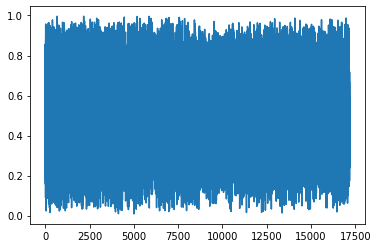

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test[:, 1])
plt.show()

In [34]:
print(min(y_test[:, 1]))
print(max(y_test[:, 1]))


0.008505990698417138
0.9962795503882239
